In [1]:
import tensorflow as tf

2024-10-20 15:34:43.195483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 15:34:44.913009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


2024-10-20 15:35:05.515005: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-20 15:35:05.589210: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging

[[1.]
 [2.]]
--
[1.]
--
[[1.]]


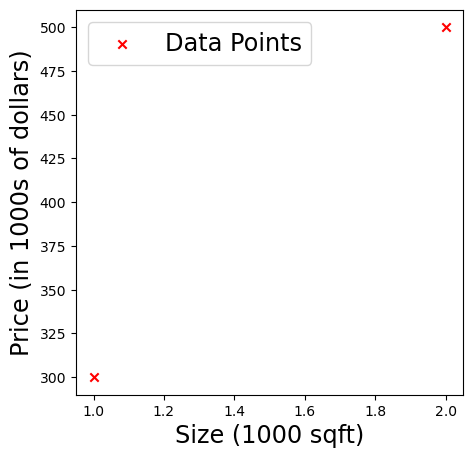

In [5]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')

#space

print(X_train)
print(f"--")
print(X_train[0])
print(f"--")
print(X_train[0].reshape(1,1))
plt.show()

In [6]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear',)

In [7]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in X_train. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [8]:
a1=linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-1.1053462]], shape=(1, 1), dtype=float32)


In [9]:
w,b=linear_layer.get_weights()
print(f"w={w}, b={b}")

w=[[-1.1053462]], b=[0.]


In [51]:
set_w=np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [53]:
a1=linear_layer(X_train[0].reshape(1,1))
print(a1)
alin=np.dot(set_w,X_train[0].reshape(1,1))

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)


In [59]:
prediction_tf=linear_layer(X_train)
print(prediction_tf)
prediction_np=np.dot(X_train,set_w)+set_b
print(prediction_np)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[300.]
 [500.]]


Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic regression:
𝑓𝐰,𝑏(𝑥(𝑖))=𝑔(𝐰𝑥(𝑖)+𝑏)(2)
where
𝑔(𝑥)=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑥)
 
Let's set  𝑤
  and  𝑏
  to some known values and check the model.

In [62]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

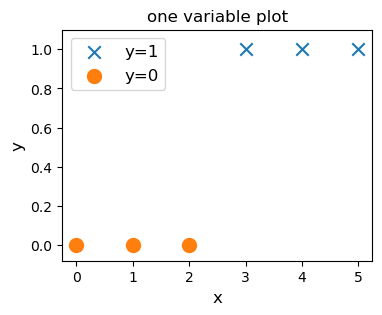

In [70]:
pos=Y_train==1
neg=Y_train==0

fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos],marker='x', s=80, label ='y=1')
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label='y=0')
ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [78]:
model=Sequential(
    [
        tf.keras.layers.Dense(1,input_dim=1, activation ='sigmoid', name='L1')
    ]
)

In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
logistic_layer=model.get_layer('L1')
w,b=logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.19971609]] [0.]
(1, 1) (1,)


In [12]:
set_w=np.array([[2]])
set_b=np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

NameError: name 'logistic_layer' is not defined